In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define a Perceptron with manual weights

In [3]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias
    
    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        return self.activation(np.dot(x, self.weights) + self.bias)

In [5]:
# Set fixed weights and bias (for an OR-like function)
weights = [1, 1]  # Weight for x1 and x2
bias = -0.5       # Bias term

In [7]:
# Create perceptron
model = Perceptron(weights, bias)

In [9]:
# Generate a grid of points to visualize decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
Z = np.array([model.predict([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

### Building OR Gate using Single Percepton

In [11]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])  # OR function output

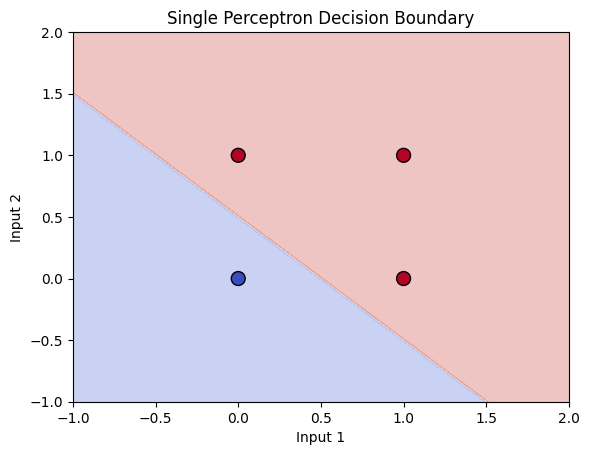

In [13]:
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Single Perceptron Decision Boundary")
plt.show()

### Building OR Gate using Single Percepton

In [15]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR function output

In [17]:
# Set arbitrary weights 
weights = [1, 1]  # Weight for x1 and x2
bias = -0.5       # Bias term

In [19]:
# Generate a grid of points for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = np.array([model.predict([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

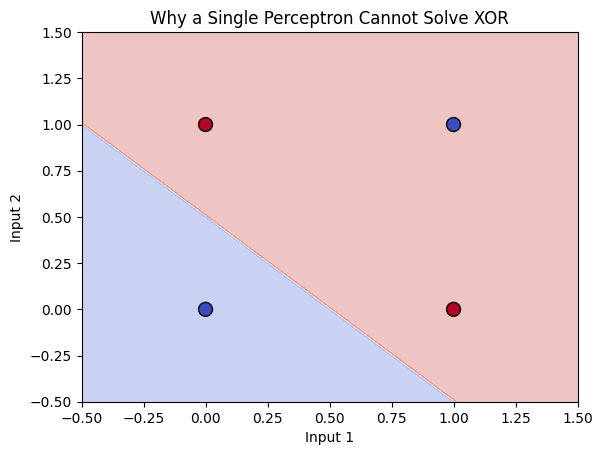

In [21]:
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot XOR data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)

# Labels and title
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Why a Single Perceptron Cannot Solve XOR")

# Show plot
plt.show()

### Key Takeaways:
- A single perceptron can only create a straight-line boundary.
- XOR requires at least two straight-line separations.
- We need a multi-layer perceptron (MLP) with hidden neurons to solve XOR.

### MLP to Solve XOR Gate

In [23]:
from sklearn.neural_network import MLPClassifier

# Train a Multi-Layer Perceptron (MLP) with more hidden neurons
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='tanh', solver='adam', max_iter=2000, random_state=42)
mlp.fit(X, y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(3,), max_iter=2000,
              random_state=42)

In [25]:
# Generate a grid for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

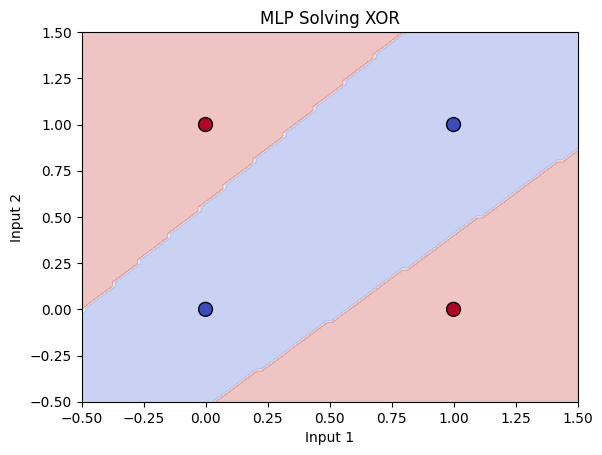

In [27]:
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot XOR data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', s=100)

# Labels and title
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("MLP Solving XOR")

# Show plot
plt.show()